# Clasifiación por Regresión Logística

Cargamos los paquetes


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Mejor C: 0.1
Mejor accuracy en CV: 0.7622
Matriz de Confusión:
[[1850  625]
 [ 560 1809]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2475
           1       0.74      0.76      0.75      2369

    accuracy                           0.76      4844
   macro avg       0.76      0.76      0.76      4844
weighted avg       0.76      0.76      0.76      4844


Importancia de las variables (Pesos):
                    Variable  Coeficiente
9              totalGoldDiff     1.183067
10                    xpDiff     0.652706
3            dragonKillsDiff     0.553673
2             totalKillsDiff     0.240901
11   totalDamageToChampsDiff     0.126742
15                 totalGold     0.086347
12                totalKills    -0.072081
6   towerPlatesDestroyedDiff    -0.060822
5        towersDestroyedDiff     0.052473
0     controlWardsPlacedDiff    -0.043912
16        blueTeamFirstBlood    -0.027349
4            

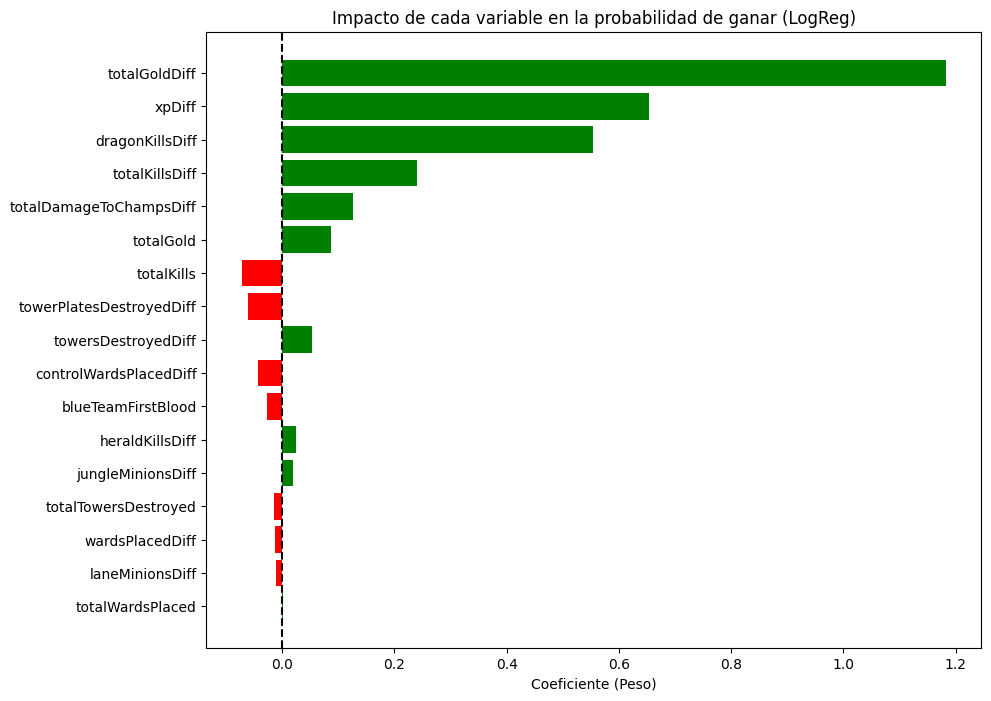

In [ ]:
df = pd.read_csv("../data/match_data_compact.csv")

X = df.drop("blueTeamWin", axis=1)
y = df["blueTeamWin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

param_grid = {
    "logreg__C": [0.01, 0.1, 1, 2, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Mejor C: {grid_search.best_params_['logreg__C']}")
print(f"Mejor accuracy en CV: {grid_search.best_score_:.4f}")

y_pred = best_model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Extraer el modelo y los nombres de columnas
model_logreg = best_model.named_steps['logreg']
coeficientes = model_logreg.coef_[0]
nombres_cols = X.columns

# Crear DataFrame de coeficientes
df_coefs = pd.DataFrame({
    'Variable': nombres_cols,
    'Coeficiente': coeficientes,
    'Abs_Coef': abs(coeficientes)  # Para ordenar por magnitud
}).sort_values(by='Abs_Coef', ascending=False)

print("\nImportancia de las variables (Pesos):")
print(df_coefs[['Variable', 'Coeficiente']])

# Gráfico de Coeficientes
plt.figure(figsize=(10, 8))
# Colorear: Verde si es positivo (ayuda a Blue), Rojo si es negativo
colors = ['green' if c > 0 else 'red' for c in df_coefs['Coeficiente']]
plt.barh(df_coefs['Variable'], df_coefs['Coeficiente'], color=colors)
plt.title("Impacto de cada variable en la probabilidad de ganar (LogReg)")
plt.xlabel("Coeficiente (Peso)")
plt.axvline(x=0, color='black', linestyle='--')  # Línea central
plt.gca().invert_yaxis()  # Invertir eje Y para ver las más importantes arriba
plt.show()

Y ahora cargamos los datos


In [3]:
df = pd.read_csv("../data/match_data_no_gold.csv")

X = df.drop("blueTeamWin", axis=1)
y = df["blueTeamWin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

Ahora hacemos validación cruzada


In [4]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Mejor C: {grid_search.best_params_['logreg__C']}")
print(f"Mejor accuracy en CV: {grid_search.best_score_:.4f}")

Mejor C: 1
Mejor accuracy en CV: 0.7587


Ahora veamos el rendimiento en el conjunto de test


In [5]:
y_pred = best_model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[1840  635]
 [ 566 1803]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2475
           1       0.74      0.76      0.75      2369

    accuracy                           0.75      4844
   macro avg       0.75      0.75      0.75      4844
weighted avg       0.75      0.75      0.75      4844




Importancia de las variables (Pesos):
                    Variable  Coeficiente
2             totalKillsDiff     0.865872
9                     xpDiff     0.844784
3            dragonKillsDiff     0.537673
5        towersDestroyedDiff     0.236376
10   totalDamageToChampsDiff     0.189782
7            laneMinionsDiff     0.167102
6   towerPlatesDestroyedDiff    -0.163653
8          jungleMinionsDiff     0.101112
4            heraldKillsDiff     0.053234
0     controlWardsPlacedDiff    -0.049417
12      totalTowersDestroyed     0.025656
14        blueTeamFirstBlood     0.025244
1            wardsPlacedDiff    -0.012554
11                totalKills     0.006378
13          totalWardsPlaced     0.001411


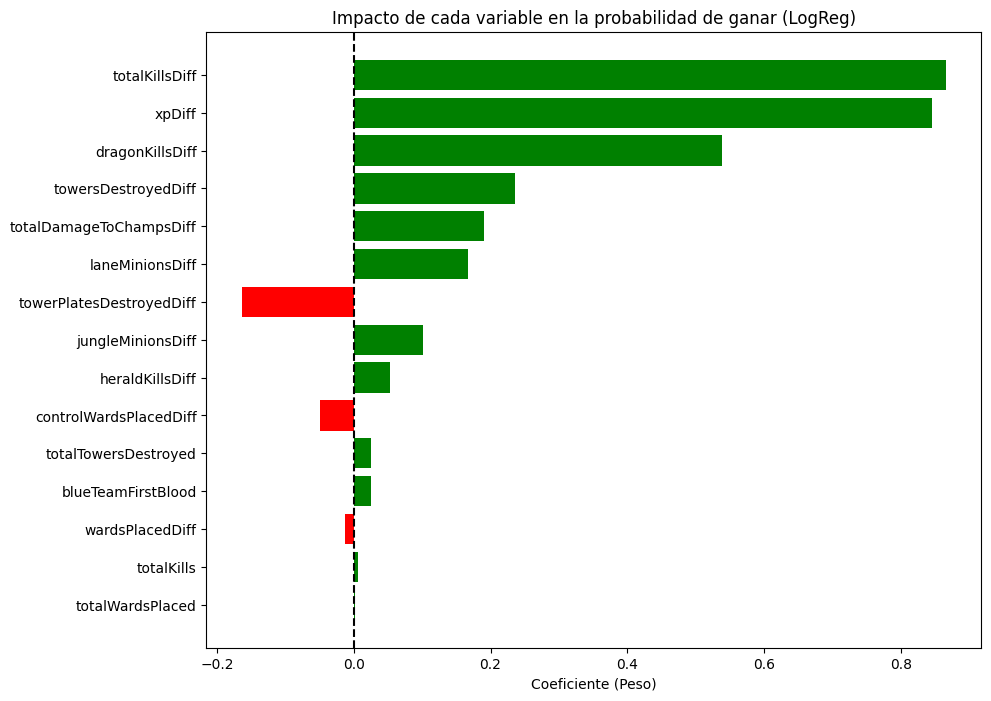

In [6]:
# Extraer el modelo y los nombres de columnas
model_logreg = best_model.named_steps['logreg']
coeficientes = model_logreg.coef_[0]
nombres_cols = X.columns

# Crear DataFrame de coeficientes
df_coefs = pd.DataFrame({
    'Variable': nombres_cols,
    'Coeficiente': coeficientes,
    'Abs_Coef': abs(coeficientes)  # Para ordenar por magnitud
}).sort_values(by='Abs_Coef', ascending=False)

print("\nImportancia de las variables (Pesos):")
print(df_coefs[['Variable', 'Coeficiente']])

# Gráfico de Coeficientes
plt.figure(figsize=(10, 8))
# Colorear: Verde si es positivo (ayuda a Blue), Rojo si es negativo
colors = ['green' if c > 0 else 'red' for c in df_coefs['Coeficiente']]
plt.barh(df_coefs['Variable'], df_coefs['Coeficiente'], color=colors)
plt.title("Impacto de cada variable en la probabilidad de ganar (LogReg)")
plt.xlabel("Coeficiente (Peso)")
plt.axvline(x=0, color='black', linestyle='--')  # Línea central
plt.gca().invert_yaxis()  # Invertir eje Y para ver las más importantes arriba
plt.show()

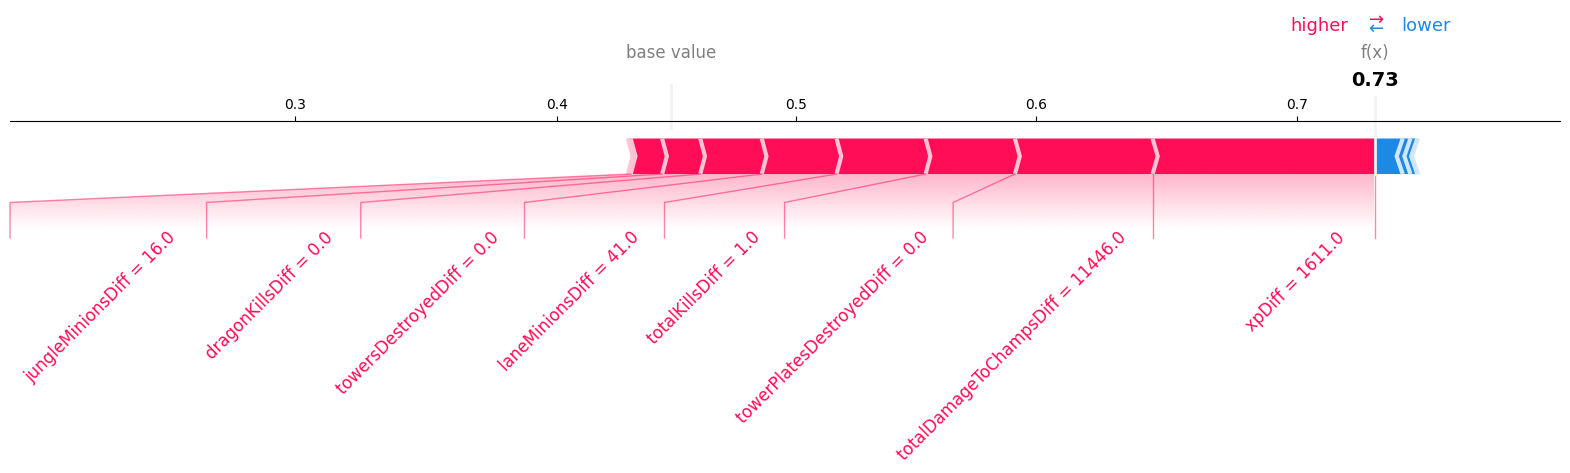

In [ ]:
import shap

# 1. Extraer las piezas del Pipeline
scaler: RobustScaler = best_model.named_steps['scaler']
model_logreg = best_model.named_steps['logreg']

# 2. Preparar los datos CORRECTOS (Escalados) para el Explainer
# Tomamos la muestra cruda y la escalamos
sample_data_raw = shap.sample(X_test, 50, random_state=0)
sample_data_scaled = scaler.transform(sample_data_raw)

# Tomamos la instancia cruda y la escalamos
instance_raw = X_test.iloc[[0]]  # DataFrame (crudo)
instance_scaled = scaler.transform(instance_raw)  # Numpy Array (escalado)

# 3. Crear el Explainer con datos ESCALADOS
# Ahora el modelo recibe lo que espera (números pequeños)
explainer = shap.LinearExplainer(model_logreg, sample_data_scaled)

# 4. Calcular SHAP values sobre la instancia ESCALADA
shap_values = explainer.shap_values(instance_scaled)

shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    instance_raw.iloc[0],
    matplotlib=True,
    text_rotation=45,
    link="logit"
)

In [19]:
shap_values_summary = explainer.shap_values(sample_data_scaled)

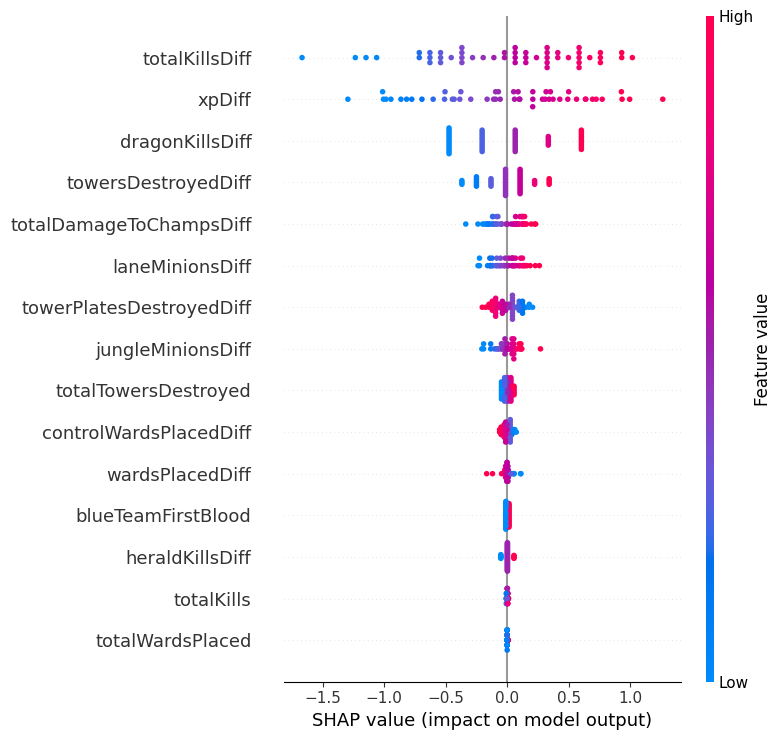

In [23]:
plt.figure(dpi=100)
shap.summary_plot(
    shap_values_summary,
    sample_data_raw,
    plot_type="dot",
    show=False
)